# Simulation math les 5 - Backwards Euler

## Zouttank

In [1]:
import numpy as np
import matplotlib.pyplot as plt

De differentiaalvergelijk voor de zouttank is:
$$\frac{dz}{dt} = 0.6 - 0.006z(t)$$ 
waarbij $z(t)$ de hoeveelheid zout op tijdstip $t$ is. 
De formule voor Backwards Euler is:
$$z(t+h) = z(t) + h \cdot (0.6 - 0.006z(t+h))$$
Deze willen we omschrijven zodat we $z(t+h)$ uit drukken in $z(t)$. Dit gaat als volgt:

##### Haakjes wegwerken
$$z(t+h) = z(t) + 0.6h  - 0.006h\cdot z(t+h)$$
##### Beide kanten $0.006h\cdot z(t+h)$ erbij:
$$z(t+h) + 0.006h\cdot z(t+h) = z(t) + 0.6h $$
##### $z(t+h)$ buiten haakjes halen
$$z(t+h)(1 + 0.006h)= z(t) + 0.6h$$
##### Beide kanten delen door $1 + 0.006h$
$$z(t+h) = \frac{z(t) + 0.6h}{1 + 0.006h}$$

In [2]:
def zouttank_be(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/stepsize)

    z = np.zeros(num_steps + 1)
    t = np.linspace(0, totaltime, num_steps+1)

    for i in range(num_steps):
        z[i+1] = (z[i]+h*0.6)/(1+0.006*h)

    return t, z

In [3]:
t, z = zouttank_be(0.1, 1000)

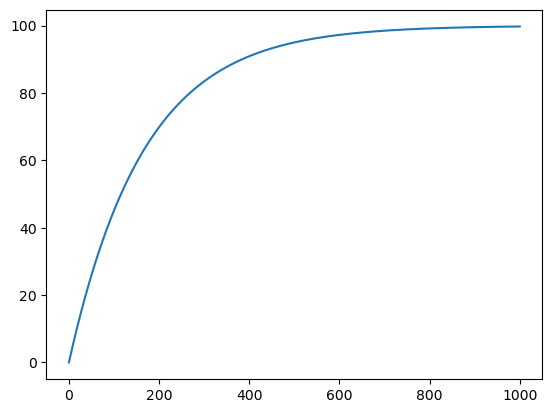

In [4]:
plt.plot(t,z)

## Stiffness

We bekijken de eerste orde differentiaalvergelijking:
$$\frac{dy}{dt} = -30 y(t)$$
met $y(0) = 1$
en passen hier forward euler op toe.

In [5]:
#implementatie met forward euler
def fe_stiffness(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/h)

    y = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)
    y[0] = 1

    t = np.linspace(0, totaltime, num_steps+1)

    for i in range(num_steps):
        y[i+1] = y[i] + h * -30 * y[i]

    return t, y

In [6]:
#implementatie van Heun
def heun_stiffness(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/h)

    y = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)
    y[0] = 1

    for step in range(num_steps):
        y_E = y[step] + h * -30 * y[step]
        t[step+1] = t[step] + h 
        y[step+1] = y[step] + h * (-30 * y[step] + -30 * y_E)/2

    return t, y

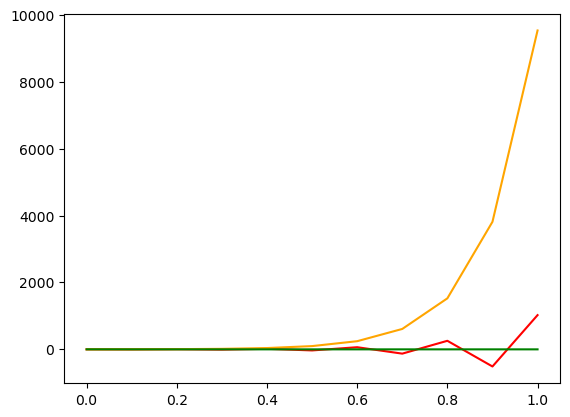

In [7]:
t, y_e = fe_stiffness(0.1, 1)
t, y_h = heun_stiffness(0.1, 1)
y_real = np.exp(-30*t)
plt.plot(t, y_e, color = 'red')
plt.plot(t, y_h, color = 'orange')
plt.plot(t, y_real, color = 'green')

Je ziet hier dat Forward Euler en Heun geen goede oplossing vinden. Backward Euler werkt hier beter! Daarvoor schrijf je:
$$y(t+h) = y(t) + h \cdot -30 \cdot y(t+h)$$
Dit kun je omschrijven naar:
$$y(t+h) + 30 \cdot h \cdot y(t+h)=y(t)$$
$$y(t+h)\cdot (1 + 30h) = y(t)$$
Delen door $1+30h$ geeft:
$$y(t+h) = \frac{y(t)}{1+30h}$$


In [8]:
#implementatie van backward euler
def be_stiffness(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/h)

    y = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)
    y[0] = 1

    t = np.linspace(0, totaltime, num_steps+1)

    for i in range(num_steps):
        y[i+1] = y[i]/(1+30*h)

    return t, y
        

In [9]:
t, y_be = be_stiffness(0.1, 1)

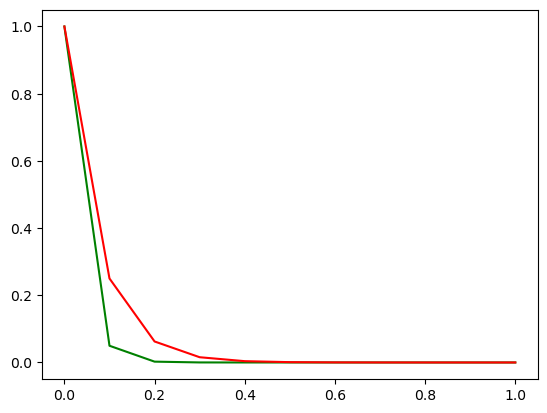

In [10]:
t, y_be = be_stiffness(0.1, 1)
#plt.plot(t, y_e, color = 'orange')
plt.plot(t, y_real, color = 'green')
plt.plot(t, y_be, color = 'red')

## Zouttank backwards euler

In [11]:
def zout_be(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/stepsize)

    t = np.zeros(num_steps + 1)
    z = np.zeros(num_steps + 1)
    t = np.linspace(0, totaltime, num_steps +1)
    
    for i in range(num_steps):
        z[i+1] = (z[i]+0.6*h)/(1+0.006*h)

    return t, z

In [12]:
def zout_fe(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/stepsize)

    t = np.zeros(num_steps + 1)
    z = np.zeros(num_steps + 1)
    t = np.linspace(0, totaltime, num_steps +1)
    
    for i in range(num_steps):
        z[i+1] = z[i] + h*(0.6 - 0.006*z[i])

    return t, z

In [13]:
t, z = zout_fe(0.01, 1000)
t, z_b3 = zout_be(0.01, 1000)

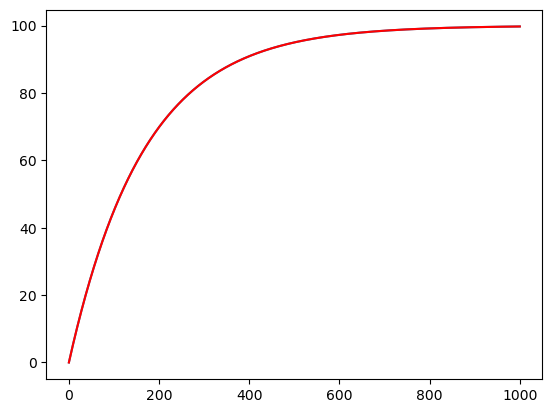

In [14]:
plt.plot(t,z)
plt.plot(t, z_b3, color = 'red')

## Mieren backwards euler

In [15]:
def mieren_be(stepsize, totaltime):
    h = stepsize
    num_steps = int(totaltime/stepsize)

    t = np.zeros(num_steps + 1)
    m = np.zeros(num_steps + 1)
    m[0] = 3000
    t = np.linspace(0, totaltime, num_steps +1)
    
    for i in range(num_steps):
        m[i+1] = (m[i]+1000*h)/(1+0.5*h)

    return t, m

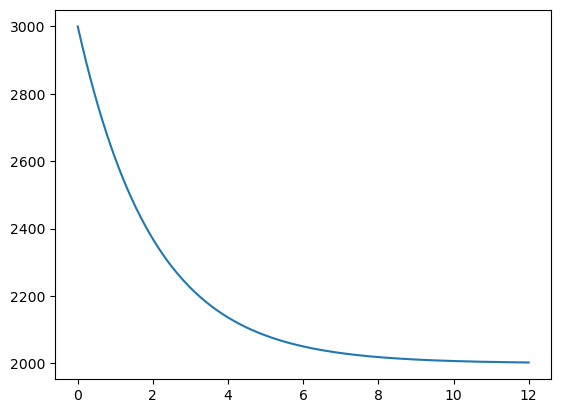

In [16]:
t,m = mieren_be(0.01, 12)
plt.plot(t,m)

## Waning immunity

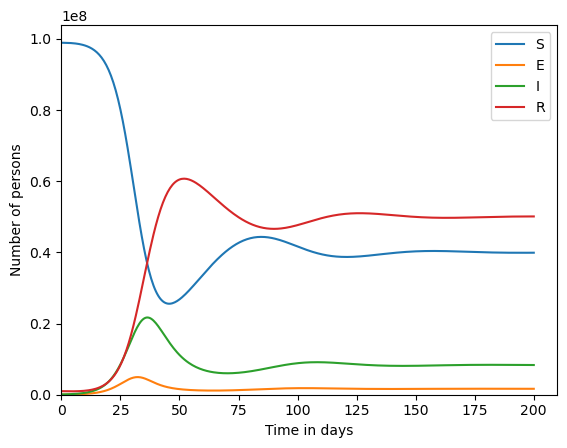

In [17]:
h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
infectious_time = 5. # days
latency = 1
waning_time = 30

end_time = 200.0 # days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

def seir_model():

    s = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    i[0] = 1e5
    r[0] = 1e6
    e[0] = 0

    for step in range(num_steps):
        s[step+1] = s[step] + h * (- transmission_coeff * i[step] * s[step]+ 1/waning_time * r[step])
        e[step+1] = e[step] + h * (transmission_coeff * i[step] * s[step] - 1/latency * e[step])
        i[step+1] = i[step] + h * (1/latency * e[step]-1/infectious_time * i[step])
        r[step+1] = r[step] + h * (1/infectious_time * i[step] - 1/waning_time * r[step]) 
    return s, e, i, r

s, e, i, r = seir_model()

def plot_me():
    s_plot = plt.plot(times, s, label='S')
    e_plot = plt.plot(times, e, label='E')
    i_plot = plt.plot(times, i, label='I')
    r_plot = plt.plot(times, r, label='R')
    
    plt.legend(loc='upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(xmin=0.)
    plt.ylim(ymin=0.)
    plt.show()

plot_me()

## No immunity

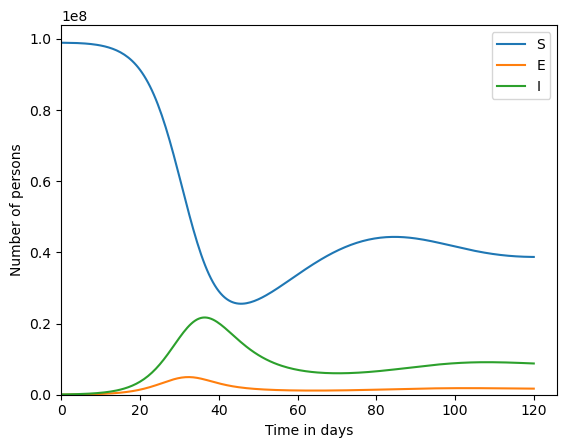

In [18]:
h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
infectious_time = 5. # days
latency = 1
waning_time = 30

end_time = 120.0 # days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

def sei_model():

    s = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    i[0] = 1e5
    e[0] = 0

    for step in range(num_steps):
        s[step+1] = s[step] + h * (- transmission_coeff * i[step] * s[step] + 1/infectious_time * i[step])
        e[step+1] = e[step] + h * (transmission_coeff * i[step] * s[step] - 1/latency * e[step])
        i[step+1] = i[step] + h * (1/latency * e[step]-1/infectious_time * i[step])
    return s, e, i

s, e, i, r = seir_model()

def plot_me():
    s_plot = plt.plot(times, s, label='S')
    e_plot = plt.plot(times, e, label='E')
    i_plot = plt.plot(times, i, label='I')
    
    plt.legend(loc='upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(xmin=0.)
    plt.ylim(ymin=0.)
    plt.show()

plot_me()